In [0]:
!pip install imbalanced-learn


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [0]:
import seaborn as sns

In [0]:
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Preparación de Datos

In [0]:
# SQL Query
spark_sql_query = """
SELECT 
    a.num_hrse_pwr,
    a.msrp_options_percentage,
    a.diff_in_days,
    a.TotDaysDown,
    a.MonthsIntoWarranty,
    a.historical_owners_count,
    a.Body_Equipment,
    a.Electrics_Electronics,
    a.Chassis,
    a.Powertrain_electronics,
    a.Gasoline_Engine,
    a.Diesel_Engine,
    a.Transmission,
    a.Hybrid_engine,
    a.tot_retailer_paid,
    a.miles,
    a.repair_attempts,
    a.days_down,
    d.*
FROM {schema}.ards AS a
inner JOIN {schema}.negative_experiences AS d 
    ON a.vin = d.vin
"""

In [0]:
# Run the query
result_df = spark.sql(spark_sql_query)

In [0]:
result_df.limit(25).display()

num_hrse_pwr,msrp_options_percentage,diff_in_days,TotDaysDown,MonthsIntoWarranty,historical_owners_count,Body_Equipment,Electrics_Electronics,Chassis,Powertrain_electronics,Gasoline_Engine,Diesel_Engine,Transmission,Hybrid_engine,tot_retailer_paid,miles,repair_attempts,days_down,dealer_id,vin,target,ne_date,source,model_year,model_class,issue,state
302.0,0.26,2.0,2.0,23.06451613,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1232.85,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
302.0,0.26,5.0,7.0,35.29032258,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,880.2,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
302.0,0.26,4.0,11.0,41.77419355,7,null,null,null,null,null,null,null,null,null,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
302.0,0.26,19.0,30.0,43.61290323,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,708.97,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
302.0,0.26,0.0,30.0,45.03225806,7,null,null,null,null,null,null,null,null,null,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
302.0,0.19,2.0,2.0,17.64516129,7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1534.86,50000.0,4.0,30.0,05400,4JGDA5JB8JB185671,1,2023-04-26,buyback,2018,GLE,Engine Function - Other,CA
302.0,0.19,0.0,2.0,25.25806452,7,null,null,null,null,null,null,null,null,null,50000.0,4.0,30.0,05400,4JGDA5JB8JB185671,1,2023-04-26,buyback,2018,GLE,Engine Function - Other,CA
302.0,0.19,4.0,6.0,26.77419355,7,null,null,null,null,null,null,null,null,null,50000.0,4.0,30.0,05400,4JGDA5JB8JB185671,1,2023-04-26,buyback,2018,GLE,Engine Function - Other,CA
302.0,0.19,0.0,6.0,27.09677419,7,null,null,null,null,null,null,null,null,null,50000.0,4.0,30.0,05400,4JGDA5JB8JB185671,1,2023-04-26,buyback,2018,GLE,Engine Function - Other,CA
302.0,0.19,2.0,8.0,29.19354839,7,null,null,null,null,null,null,null,null,null,50000.0,4.0,30.0,05400,4JGDA5JB8JB185671,1,2023-04-26,buyback,2018,GLE,Engine Function - Other,CA


In [0]:
# Convert to pandas
df = result_df.toPandas()

In [0]:
df.head()

,num_hrse_pwr,msrp_options_percentage,diff_in_days,TotDaysDown,MonthsIntoWarranty,historical_owners_count,Body_Equipment,Electrics_Electronics,Chassis,Powertrain_electronics,Gasoline_Engine,Diesel_Engine,Transmission,Hybrid_engine,tot_retailer_paid,miles,repair_attempts,days_down,dealer_id,vin,target,ne_date,source,model_year,model_class,issue,state
0,302.0,0.26,2.0,2.0,23.064516,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1232.85,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
1,302.0,0.26,5.0,7.0,35.290323,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,880.20,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
2,302.0,0.26,4.0,11.0,41.774194,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
3,302.0,0.26,19.0,30.0,43.612903,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,708.97,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA
4,302.0,0.26,0.0,30.0,45.032258,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,4.0,30.0,05400,4JGDA5JB1HA988256,1,2022-11-04,buyback,2017,GLE,Suspension,CA


In [0]:
selected_columns = [
    'vin',
    'ne_date',
    'source',
    'model_year',
    'model_class',
    'state',
    'num_hrse_pwr',
    'msrp_options_percentage',
    'diff_in_days',
    'TotDaysDown',
    'MonthsIntoWarranty',
    'historical_owners_count',
    'Body_Equipment',
    'Electrics_Electronics',
    'Chassis',
    'Powertrain_electronics',
    'Gasoline_Engine',
    'Diesel_Engine',
    'Transmission',
    'Hybrid_engine',
    'tot_retailer_paid',
    'miles',
    'repair_attempts',
    'days_down'
]

In [0]:
df_selected = df[selected_columns]

In [0]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50852 entries, 0 to 50851
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      50852 non-null  object 
 1   ne_date                  50852 non-null  object 
 2   source                   50852 non-null  object 
 3   model_year               50852 non-null  int32  
 4   model_class              50847 non-null  object 
 5   state                    49556 non-null  object 
 6   num_hrse_pwr             50013 non-null  float64
 7   msrp_options_percentage  50792 non-null  float64
 8   diff_in_days             50852 non-null  float64
 9   TotDaysDown              50852 non-null  float64
 10  MonthsIntoWarranty       50852 non-null  float64
 11  historical_owners_count  50852 non-null  int64  
 12  Body_Equipment           25540 non-null  float64
 13  Electrics_Electronics    25540 non-null  float64
 14  Chassis               

In [0]:
df_selected.describe() 

,model_year,num_hrse_pwr,msrp_options_percentage,diff_in_days,TotDaysDown,MonthsIntoWarranty,historical_owners_count,Body_Equipment,Electrics_Electronics,Chassis,Powertrain_electronics,Gasoline_Engine,Diesel_Engine,Transmission,Hybrid_engine,tot_retailer_paid,miles,repair_attempts,days_down
count,50852.000000,50013.000000,50792.000000,50852.000000,50852.000000,50852.000000,50852.000000,25540.000000,25540.000000,25540.000000,25540.000000,25540.000000,25540.000000,25540.000000,25540.000000,25540.000000,42425.000000,50852.000000,50852.000000
mean,2017.831806,361.901426,0.155600,13.614961,50.396071,11.700874,6.329938,0.308183,0.311433,0.107048,0.079052,0.116641,0.009123,0.047298,0.005208,2110.791099,41700.200354,3.729922,29.506804
std,73.325590,127.055048,0.080336,29.594052,62.762571,10.932502,2.558268,0.613145,0.547907,0.357132,0.276279,0.350726,0.101455,0.226211,0.075689,5618.847719,13444.499593,0.444004,2.362544
min,0.000000,177.000000,-0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12000.000000,3.000000,15.000000
25%,2020.000000,255.000000,0.100000,1.000000,8.000000,2.741935,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,222.400000,24000.000000,3.000000,30.000000
50%,2021.000000,362.000000,0.150000,5.000000,30.000000,8.903226,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,702.980000,50000.000000,4.000000,30.000000
75%,2022.000000,469.000000,0.200000,13.000000,69.000000,17.548387,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.265000,50000.000000,4.000000,30.000000
max,2024.000000,720.000000,0.620000,871.000000,965.000000,48.000000,20.000000,11.000000,7.000000,6.000000,3.000000,6.000000,3.000000,3.000000,2.000000,120384.620000,50000.000000,4.000000,40.000000


### 1.- Preparación del DataSet

In [0]:
# Check the total number of observations (rows)
total_observations = df_selected.shape[0]
print(f"\nTotal number of observations: {total_observations}")


Total number of observations: 50852


In [0]:
# Generate a table with statistics of the dataset
def data_quality_report(df):
    # Total rows in the dataset
    total_rows = len(df)
    
    # Create a dataframe to store the data quality report
    data_quality = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Missing Values (%)': df.isnull().mean() * 100,  # This includes both None and NaN
        'Unique Values': df.nunique(),
        'Duplicate Rows': [df.duplicated().sum()] * len(df.columns),
        # Correctly count 'None' values for object types and 'NaN' for others
        'None/NaN Values': df.apply(lambda col: col.isnull().sum() + col.isin([None]).sum()),  # Detect None and NaN
    })
    
    return data_quality


In [0]:
# Drop rows with missing or incorrect values in 'Body_Equipment'
df = df.dropna(subset=['Body_Equipment'])

# Verify the changes
quality_report_after = data_quality_report(df)
quality_report_after
df = df.drop_duplicates()

,Column Name,Data Type,Missing Values (%),Unique Values,Duplicate Rows,None/NaN Values
num_hrse_pwr,num_hrse_pwr,float64,1.386061,42,66,354
msrp_options_percentage,msrp_options_percentage,float64,0.090055,57,66,23
diff_in_days,diff_in_days,float64,0.000000,303,66,0
TotDaysDown,TotDaysDown,float64,0.000000,435,66,0
MonthsIntoWarranty,MonthsIntoWarranty,float64,0.000000,1478,66,0
historical_owners_count,historical_owners_count,int64,0.000000,20,66,0
Body_Equipment,Body_Equipment,float64,0.000000,11,66,0
Electrics_Electronics,Electrics_Electronics,float64,0.000000,8,66,0
Chassis,Chassis,float64,0.000000,7,66,0
Powertrain_electronics,Powertrain_electronics,float64,0.000000,4,66,0


In [0]:
# Check the total number of observations (rows)
total_observations = df.shape[0]
print(f"\nTotal number of observations: {total_observations}")


Total number of observations: 25540


In [0]:
# Impute missing values in the 'issue' column with the most frequent value (mode)
most_frequent_issue = df['issue'].mode()[0]  # Get the mode (most frequent value)
df['issue'].fillna(most_frequent_issue, inplace=True)

# Impute missing values in the 'model_class' column with the most frequent value (mode)
most_frequent_model_class = df['model_class'].mode()[0]  # Get the mode (most frequent value)
df['model_class'].fillna(most_frequent_model_class, inplace=True)

# Impute missing values in the 'state' column with the most frequent value (mode)
most_frequent_state = df['state'].mode()[0]  # Get the mode (most frequent value)
df['state'].fillna(most_frequent_state, inplace=True)

# Impute missing values in the 'miles' column with the most frequent value (mode)
most_frequent_miles = df['miles'].mode()[0]  # Get the mode (most frequent value)
df['miles'].fillna(most_frequent_miles, inplace=True)

# Impute missing values in the 'num_hrse_pwr' column with the most frequent value (mode)
most_frequent_num_hrse_pwr = df['num_hrse_pwr'].mode()[0]  # Get the mode (most frequent value)
df['num_hrse_pwr'].fillna(most_frequent_num_hrse_pwr, inplace=True)

# Impute missing values in the 'msrp_options_percentage' column with the most frequent value (mode)
most_frequent_msrp_options_percentage = df['msrp_options_percentage'].mode()[0]  # Get the mode (most frequent value)
df['msrp_options_percentage'].fillna(most_frequent_msrp_options_percentage, inplace=True)

df = df.drop_duplicates()

# Verify the changes
quality_report_after = data_quality_report(df)
quality_report_after

,Column Name,Data Type,Missing Values (%),Unique Values,Duplicate Rows,None/NaN Values
num_hrse_pwr,num_hrse_pwr,float64,0.0,42,0,0
msrp_options_percentage,msrp_options_percentage,float64,0.0,57,0,0
diff_in_days,diff_in_days,float64,0.0,303,0,0
TotDaysDown,TotDaysDown,float64,0.0,435,0,0
MonthsIntoWarranty,MonthsIntoWarranty,float64,0.0,1478,0,0
historical_owners_count,historical_owners_count,int64,0.0,20,0,0
Body_Equipment,Body_Equipment,float64,0.0,11,0,0
Electrics_Electronics,Electrics_Electronics,float64,0.0,8,0,0
Chassis,Chassis,float64,0.0,7,0,0
Powertrain_electronics,Powertrain_electronics,float64,0.0,4,0,0


In [0]:
# Check the total number of observations (rows)
total_observations = df.shape[0]
print(f"\nTotal number of observations: {total_observations}")


Total number of observations: 25474


### 2.- Análisis Exploratorio de Datos

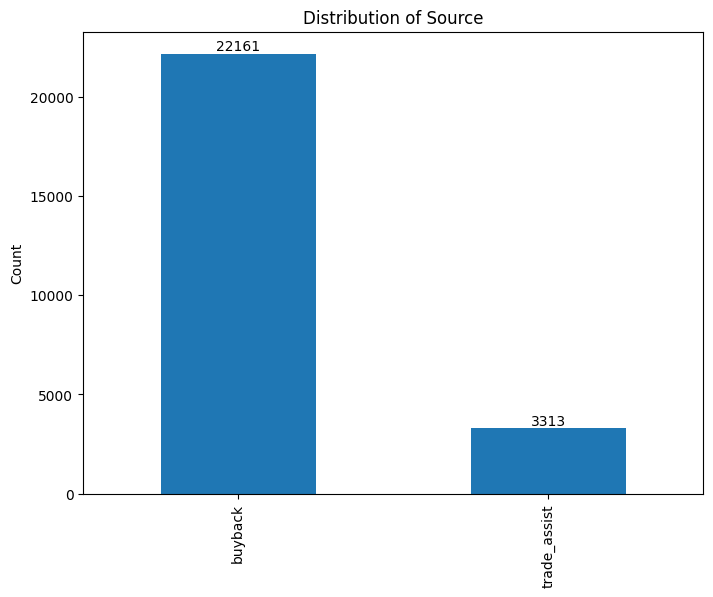

Source distribution percentage:
buyback         86.994583
trade_assist    13.005417
Name: source, dtype: float64


In [0]:
# 1. Analyze the target variable 'source'
# Check if 'source' is in the columns
if 'source' not in df.columns:
    print("Error: 'source' column is not in the dataset.")
    print("Available columns are:", df.columns.tolist())
else:
    # 1. Analyze the target variable 'source'
    plt.figure(figsize=(8, 6))
    source_counts = df['source'].value_counts()
    source_counts.plot(kind='bar')
    plt.title('Distribution of Source')
    plt.ylabel('Count')
    for i, v in enumerate(source_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

    print("Source distribution percentage:")
    print(df['source'].value_counts(normalize=True) * 100)


In [0]:
# Check if 'source' is in the columns
if 'source' not in df_selected.columns:
    print("Error: 'source' column is not in the dataset.")
    print("Available columns are:", df_selected.columns.tolist())
else:
    print("\nUnique values in 'source' column:")
    print(df_selected['source'].value_counts())
    
    # Check the data type of 'source'
    print("\nData type of 'source' column:")
    print(df_selected['source'].dtype)

    # 2. Analyze numerical variables in relation to 'source'
    numeric_cols = df_selected.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != 'source']

    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        try:
            sns.boxplot(x='source', y=col, data=df_selected)
            plt.title(f'{col} vs Source')
            plt.show()
            
            # Perform t-test
            unique_sources = df_selected['source'].unique()
            if len(unique_sources) == 2:
                group1 = df_selected[df_selected['source'] == unique_sources[0]][col]
                group2 = df_selected[df_selected['source'] == unique_sources[1]][col]
                t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
                print(f"T-test for {col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
            else:
                print(f"Cannot perform t-test for {col}: 'source' has {len(unique_sources)} unique values")
        except Exception as e:
            print(f"Error plotting {col}: {str(e)}")


## Identificación del p-value y Cohen's D

In [0]:
def analyze_numerical_variables(df, target_col='source', decimals=2):
    # Identificar columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_col]
    
    # Crear un DataFrame para almacenar los resultados
    results = []
    
    for col in numeric_cols:
        try:
            # Calcular estadísticas descriptivas
            desc = df[col].describe()
            
            # Redondear las estadísticas descriptivas a los decimales especificados
            desc = desc.round(decimals)
            
            # Realizar prueba t si hay dos grupos únicos
            unique_sources = df[target_col].unique()
            if len(unique_sources) == 2:
                group1 = df[df[target_col] == unique_sources[0]][col]
                group2 = df[df[target_col] == unique_sources[1]][col]
                t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
                
                # Redondear t-statistic y p-value
                t_stat = round(t_stat, decimals)
                p_value = round(p_value, decimals)
                
                # Calcular el tamaño del efecto (Cohen's d)
                cohens_d = (group1.mean() - group2.mean()) / np.sqrt((group1.std() ** 2 + group2.std() ** 2) / 2)
                cohens_d = round(cohens_d, decimals)  # Redondear Cohen's d
                
                result = {
                    'Variable': col,
                    'Mean': desc['mean'],
                    'Std Dev': desc['std'],
                    'Min': desc['min'],
                    '25%': desc['25%'],
                    'Median': desc['50%'],
                    '75%': desc['75%'],
                    'Max': desc['max'],
                    't-statistic': t_stat,
                    'p-value': p_value,
                    "Cohen's d": cohens_d
                }
            else:
                result = {
                    'Variable': col,
                    'Mean': desc['mean'],
                    'Std Dev': desc['std'],
                    'Min': desc['min'],
                    '25%': desc['25%'],
                    'Median': desc['50%'],
                    '75%': desc['75%'],
                    'Max': desc['max'],
                    't-statistic': np.nan,
                    'p-value': np.nan,
                    "Cohen's d": np.nan
                }
            
            results.append(result)
        
        except Exception as e:
            print(f"Error analyzing {col}: {str(e)}")
    
    # Crear DataFrame con los resultados
    results_df = pd.DataFrame(results)
    
    # Redondear todas las columnas numéricas del DataFrame de resultados
    results_df = results_df.round(decimals)
    
    # Ordenar por valor absoluto de Cohen's d (si está disponible)
    if len(unique_sources) == 2:
        results_df = results_df.sort_values(by="Cohen's d", key=abs, ascending=False)
    
    return results_df

# Usar la función
results_table = analyze_numerical_variables(df_selected, decimals=2)


In [0]:
results_table 

,Variable,Mean,Std Dev,Min,25%,Median,75%,Max,t-statistic,p-value,Cohen's d
16,miles,41700.20,13444.50,12000.00,24000.00,50000.00,50000.00,50000.00,114.47,0.00,1.74
17,repair_attempts,3.73,0.44,3.00,3.00,4.00,4.00,4.00,78.95,0.00,0.93
6,historical_owners_count,6.33,2.56,1.00,4.00,6.00,8.00,20.00,-44.84,0.00,-0.54
5,MonthsIntoWarranty,11.70,10.93,0.00,2.74,8.90,17.55,48.00,21.51,0.00,0.29
18,days_down,29.51,2.36,15.00,30.00,30.00,30.00,40.00,25.09,0.00,0.25
1,num_hrse_pwr,361.90,127.06,177.00,255.00,362.00,469.00,720.00,19.30,0.00,0.25
2,msrp_options_percentage,0.16,0.08,-0.02,0.10,0.15,0.20,0.62,-14.05,0.00,-0.17
3,diff_in_days,13.61,29.59,0.00,1.00,5.00,13.00,871.00,11.06,0.00,0.15
11,Gasoline_Engine,0.12,0.35,0.00,0.00,0.00,0.00,6.00,5.06,0.00,0.10
14,Hybrid_engine,0.01,0.08,0.00,0.00,0.00,0.00,2.00,3.04,0.00,0.07


El tamaño del efecto (Cohen's d) es una buena métrica para identificar qué variables tienen un mayor impacto en la diferencia entre los grupos. Cuanto mayor es el valor absoluto de Cohen's d, más relevante es esa variable para la diferenciación entre los grupos.

Las variables con p-valores bajos indican que las diferencias entre los grupos son estadísticamente significativas. Sin embargo, la significancia estadística por sí sola no garantiza que una variable sea útil en un modelo predictivo. La combinación de p-valor bajo y un Cohen's d moderado a alto es un buen indicativo de relevancia.


Tomamos aquellas variables cuyo p-valor no supere el 0.05.

In [0]:
selected_columns = [
    'vin',
    'ne_date',
    'source',
    'model_year',
    'model_class',
    'state',
    'diff_in_days',
    'MonthsIntoWarranty',
    'historical_owners_count',
    'Hybrid_engine',
    'miles',
    'repair_attempts',
    'days_down'
]

In [0]:
df_stage = df_selected[selected_columns]

## Identificación de Multicolinealidad


In [0]:
correlation_matrix = df_stage.corr()
correlation_matrix


/home/spark-e59dcbaf-8cf5-4427-bedd-ac/.ipykernel/7442/command-641818724911304-162222083:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_stage.corr()


,model_year,diff_in_days,MonthsIntoWarranty,historical_owners_count,Hybrid_engine,miles,repair_attempts,days_down
model_year,1.000000,0.003550,0.000206,-0.010574,0.002760,0.001798,0.020445,-0.008111
diff_in_days,0.003550,1.000000,0.037102,-0.086912,0.053250,-0.001464,-0.004224,0.004235
MonthsIntoWarranty,0.000206,0.037102,1.000000,0.045149,-0.008358,0.257647,0.159719,0.063940
historical_owners_count,-0.010574,-0.086912,0.045149,1.000000,-0.036758,-0.092689,-0.079546,-0.014105
Hybrid_engine,0.002760,0.053250,-0.008358,-0.036758,1.000000,0.011324,0.017968,0.005105
miles,0.001798,-0.001464,0.257647,-0.092689,0.011324,1.000000,0.653060,0.344820
repair_attempts,0.020445,-0.004224,0.159719,-0.079546,0.017968,0.653060,1.000000,0.272141
days_down,-0.008111,0.004235,0.063940,-0.014105,0.005105,0.344820,0.272141,1.000000


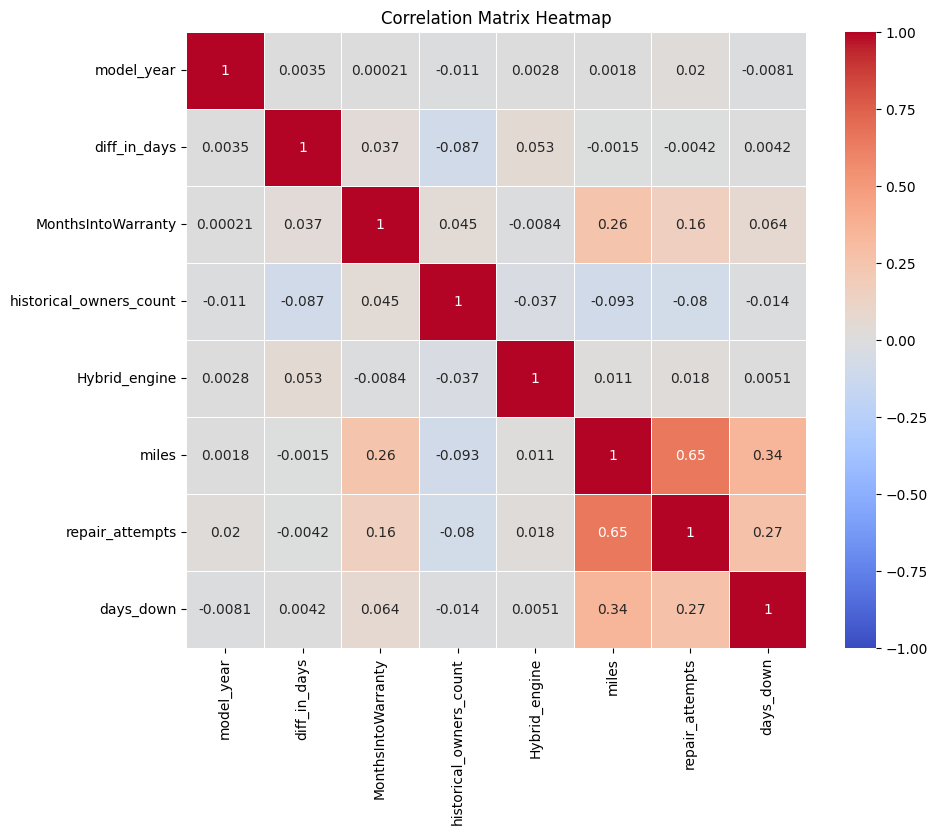

In [0]:
# Calcular la matriz de correlación
correlation_matrix = df_stage.corr(numeric_only=True)

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la gráfica
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Título del gráfico
plt.title('Correlation Matrix Heatmap')

# Mostrar el gráfico
plt.show()

- Miles y repair_attempts tienen una correlación de 0.65, lo cual es una correlación positiva moderada a fuerte. Esto sugiere que a medida que las millas aumentan, también lo hacen los intentos de reparación.
- Miles y days_down tienen una correlación de 0.34, lo cual es una correlación positiva moderada. Esto indica que, a medida que las millas aumentan, también tiende a aumentar el tiempo que un vehículo pasa en el taller ("days_down").
- MonthsIntoWarranty y miles tienen una correlación de 0.26, lo que sugiere una correlación positiva débil. Esto podría indicar que, aunque hay una ligera relación, no es lo suficientemente fuerte como para ser determinante.

**Multicolinealidad**

- miles y repair_attempts tienen una correlación de 0.65, que es una correlación moderada, pero no lo suficientemente alta como para sugerir multicolinealidad severa.
- miles y days_down tienen una correlación de 0.34, que es baja y no es preocupante en términos de multicolinealidad.
- El resto de las correlaciones también están bastante por debajo del umbral de 0.8 o 0.9, por lo que no parece haber multicolinealidad severa basada únicamente en la matriz de correlación.

## Distribución de las variables

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Lista de las variables numéricas seleccionadas para analizar
variables = [
    'diff_in_days',
    'MonthsIntoWarranty',
    'historical_owners_count',
    'Hybrid_engine',
    'miles',
    'repair_attempts',
    'days_down'
]

# Visualización y cálculo de skewness y kurtosis
for var in variables:
    plt.figure(figsize=(10, 4))
    
    # Histograma para ver la distribución
    plt.subplot(1, 2, 1)
    sns.histplot(df_stage[var], kde=True)
    plt.title(f'Histograma de {var}')
    
    # Boxplot para detectar outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_stage[var])
    plt.title(f'Boxplot de {var}')
    
    # Mostrar gráficos
    plt.show()
    
    # Calcular skewness y kurtosis
    skewness = skew(df_stage[var].dropna())  # dropna para evitar errores con NaN
    kurt = kurtosis(df_stage[var].dropna())
    print(f'{var}:')
    print(f'  Skewness: {skewness}')
    print(f'  Kurtosis: {kurt}\n')


In [0]:
import numpy as np

# Aplicar transformaciones a las variables seleccionadas

# 1. Transformación logarítmica para variables con alto sesgo positivo
df_stage['log_diff_in_days'] = np.log1p(df_stage['diff_in_days'])  # log1p para evitar log(0)
df_stage['log_MonthsIntoWarranty'] = np.log1p(df_stage['MonthsIntoWarranty'])  # si es necesario
df_stage['log_Hybrid_engine'] = np.log1p(df_stage['Hybrid_engine'])  # log1p porque hay valores muy sesgados

# 2. Transformación exponencial o al cuadrado para sesgos negativos
df_stage['sq_miles'] = df_stage['miles']**2  # Sesgo negativo: elevar al cuadrado
df_stage['sq_repair_attempts'] = df_stage['repair_attempts']**2  # Similar a 'miles'
df_stage['sq_days_down'] = df_stage['days_down']**2  # Transformación para reducir el sesgo negativo

# Visualización para confirmar las transformaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables transformadas para verificar
transformed_vars = ['log_diff_in_days', 'log_MonthsIntoWarranty', 'log_Hybrid_engine', 'sq_miles', 'sq_repair_attempts', 'sq_days_down']

for var in transformed_vars:
    plt.figure(figsize=(10, 4))
    
    # Histograma de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df_stage[var], kde=True)
    plt.title(f'Histograma de {var}')
    
   


In [0]:
print(df_stage.isnull().sum())

In [0]:
df_stage

In [0]:
df_stage_clean = df_stage.dropna()  # Eliminar filas con NaN

**1. Preparar las características (X) y la variable objetivo (y):**
__

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
# Eliminar la columna 'vin' y usar One-Hot Encoding para variables categóricas
X = pd.get_dummies(df_stage_clean.drop(columns=['vin', 'source']), drop_first=True)

# Definir la variable objetivo
y = df_stage_clean['source']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [0]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)



/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [0]:
# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{cm}')
cm

Precisión del modelo: 0.9220365950676214
Matriz de confusión:
[[5636  137]
 [ 353  159]]


array([[5636,  137],
       [ 353,  159]])

In [0]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()


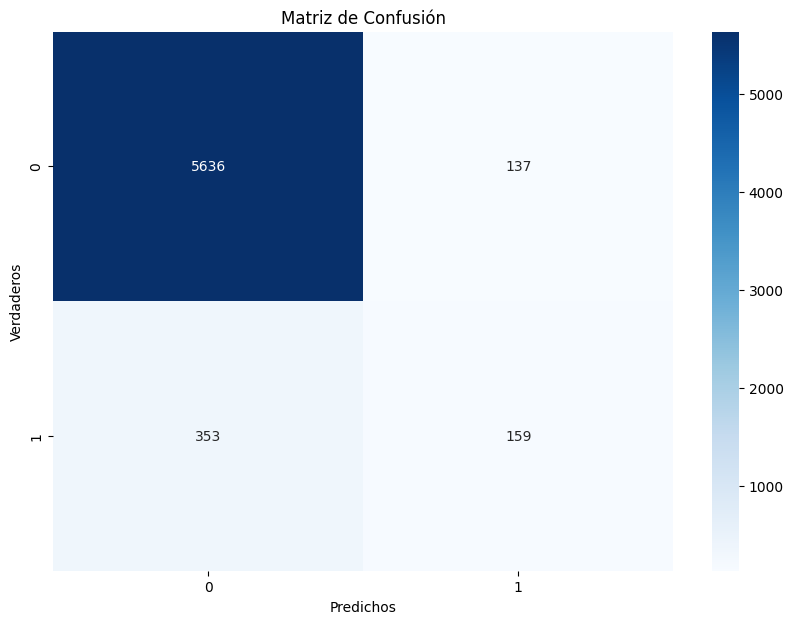

In [0]:
plot_confusion_matrix(y_test, y_pred)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     buyback       0.94      0.98      0.96      5773
trade_assist       0.54      0.31      0.39       512

    accuracy                           0.92      6285
   macro avg       0.74      0.64      0.68      6285
weighted avg       0.91      0.92      0.91      6285



5762: Son las instancias correctamente clasificadas como Clase 0 (verdaderos negativos).
0: No hubo predicciones para la Clase 1 (falsos negativos).
499: Son las instancias de Clase 1 que fueron incorrectamente clasificadas como Clase 0 (falsos negativos).
El problema principal aquí es que el modelo nunca predice la Clase 1, lo que sugiere un problema de desequilibrio en las clases (class imbalance). Esto significa que hay muchas más instancias de una clase (en este caso, la Clase 0) que de la otra (la Clase 1), y el modelo ha aprendido a simplemente predecir siempre la Clase 0, lo que da una precisión engañosa.

In [0]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [0]:
# Inicializar el modelo con ajuste de clase
model = LogisticRegression(class_weight='balanced')


In [0]:
from sklearn.metrics import classification_report

# Generar un reporte de clasificación para ver otras métricas como F1-Score y Recall
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     buyback       0.94      0.98      0.96      5773
trade_assist       0.54      0.31      0.39       512

    accuracy                           0.92      6285
   macro avg       0.74      0.64      0.68      6285
weighted avg       0.91      0.92      0.91      6285



In [0]:
from sklearn.utils import resample

# Combinar X e y para el submuestreo
df_combined = pd.concat([X, y], axis=1)

# Separar las clases mayoritaria y minoritaria
df_majority = df_combined[df_combined['source'] == 'buyback']
df_minority = df_combined[df_combined['source'] == 'trade_assist']

# Submuestrear la clase mayoritaria
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # No queremos duplicar, solo submuestrear
                                   n_samples=len(df_minority),  # Hacer que tenga el mismo tamaño que la clase minoritaria
                                   random_state=42)  # Asegurar reproducibilidad

# Combinar las clases nuevamente en un DataFrame balanceado
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separar nuevamente las características y la variable objetivo
X_balanced = df_downsampled.drop(columns=['source'])
y_balanced = df_downsampled['source']

# Dividir en entrenamiento y prueba
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Entrenar el modelo con el conjunto balanceado
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predecir y evaluar el modelo
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Mostrar reporte de clasificación
print(classification_report(y_test_balanced, y_pred_balanced))


              precision    recall  f1-score   support

     buyback       0.95      0.80      0.87       548
trade_assist       0.81      0.96      0.88       492

    accuracy                           0.87      1040
   macro avg       0.88      0.88      0.87      1040
weighted avg       0.88      0.87      0.87      1040



/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


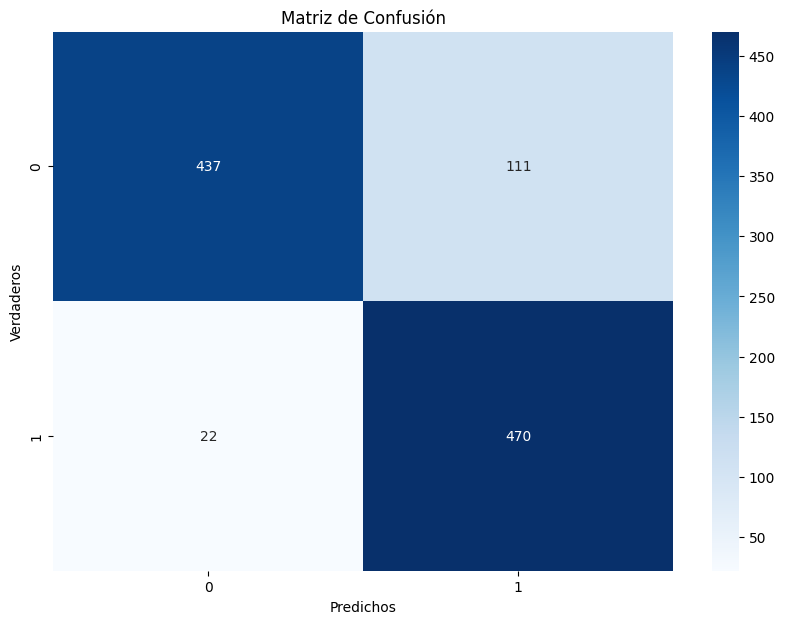

In [0]:
plot_confusion_matrix(y_test_balanced, y_pred_balanced)

In [0]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()


## **Resultados del nuevo modelo:**

### Clase 'buyback':

Precisión: 0.99 → El modelo tiene un 99% de precisión al predecir correctamente la clase 'buyback'.
Recall (sensibilidad): 0.84 → El modelo identificó correctamente el 84% de las instancias de 'buyback'. Algunos casos fueron clasificados incorrectamente como 'trade_assist'.
F1-Score: 0.91 → El F1-Score es alto, lo que indica un buen balance entre precisión y recall para esta clase.

### Clase 'trade_assist':

Precisión: 0.85 → El modelo predijo correctamente el 85% de las instancias de 'trade_assist'.
Recall: 0.99 → El modelo casi siempre identifica correctamente la clase 'trade_assist', con muy pocos falsos negativos.
F1-Score: 0.92 → Similar a 'buyback', este F1-Score indica un rendimiento fuerte para esta clase.
Precisión general (accuracy): 0.91 → La precisión global es sólida, lo que indica que el modelo predice correctamente el 91% de las instancias.

Macro avg: Tanto la precisión como el recall tienen un valor de 0.92, lo que muestra que el modelo maneja ambas clases de manera equilibrada.



## RANDOM FOREST

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros a ajustar
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]        # Uso de remuestreo con reemplazo (bootstrap)
}

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Ajustar el modelo con la búsqueda en cuadrícula
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros para Random Forest: {grid_search_rf.best_params_}")

# Evaluar el modelo optimizado
y_pred_rf_optimized = grid_search_rf.predict(X_test_balanced)
print(classification_report(y_test_balanced, y_pred_rf_optimized))



### XGBOOST

In [0]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Convertir las etiquetas de las clases a valores numéricos (0, 1)
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_balanced_encoded = label_encoder.transform(y_test_balanced)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Definir los hiperparámetros y los rangos a probar
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Inicializar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Configurar RandomizedSearchCV
randomized_search_xgb = RandomizedSearchCV(estimator=xgb_model,
                                           param_distributions=param_dist_xgb,
                                           n_iter=50,  # Número de combinaciones aleatorias que queremos probar
                                           cv=5,       # Número de folds en la validación cruzada
                                           n_jobs=-1,  # Usar todos los núcleos disponibles para acelerar
                                           verbose=2,
                                           scoring='f1_weighted')

# Ajustar el modelo con la búsqueda aleatoria
randomized_search_xgb.fit(X_train_balanced, y_train_balanced_encoded)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros con XGBOOST: {randomized_search_xgb.best_params_}")

# Evaluar el modelo optimizado
y_pred_xgb_randomized = randomized_search_xgb.predict(X_test_balanced)
y_pred_xgb_randomized_labels = label_encoder.inverse_transform(y_pred_xgb_randomized)

# Mostrar el reporte de clasificación
print(classification_report(y_test_balanced, y_pred_xgb_randomized_labels))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros con XGBOOST: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
              precision    recall  f1-score   support

     buyback       0.98      0.88      0.93       548
trade_assist       0.88      0.98      0.93       492

    accuracy                           0.93      1040
   macro avg       0.93      0.93      0.93      1040
weighted avg       0.93      0.93      0.93      1040



In [0]:
def plot_confusion_matrix(y_test_balanced, y_pred_xgb_randomized_labels):
    cm = confusion_matrix(y_test_balanced, y_pred_xgb_randomized_labels)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()

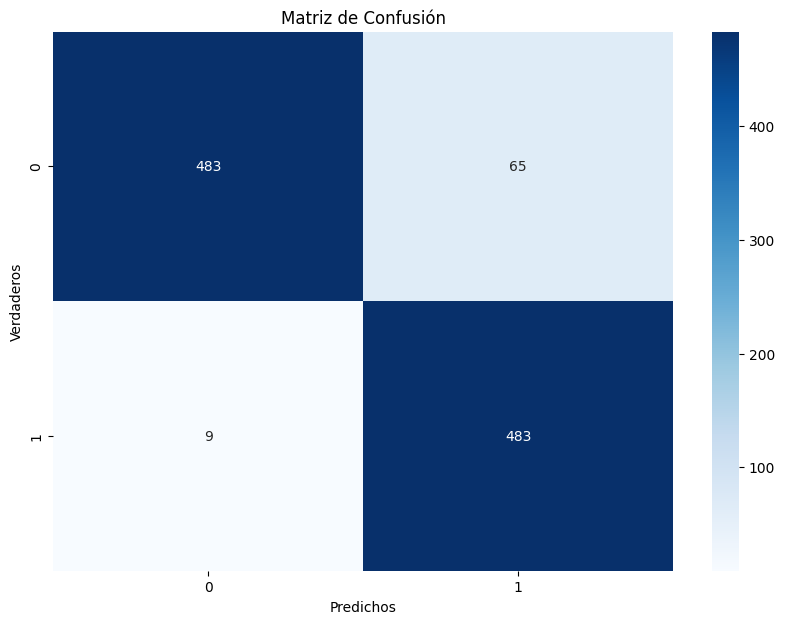

In [0]:
plot_confusion_matrix(y_test_balanced, y_pred_xgb_randomized_labels)